# Compare logistic regression and kNN

This is an open-ended lab.

You should:

- Load in the wine dataset (create target, concatenate, normalize predictors)
- Do EDA on predictors
- Select predictors of interest
- Load KNeighborsClassifier and LogisticRegression from sklearn
- Compare performance between the two using stratified cross-validation
- [Optional bonus] Plot the results of kNN vs. Logistic regression using the plotting functions I wrote yesterday and today. You may have to modify the functions to work for you.

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split, StratifiedKFold
%matplotlib inline

sales = pd.read_csv('../../../../../iowa_data/Iowa_Liquor_sales_sample_10pct.csv')
sales["Date"] = pd.to_datetime(sales["Date"], format = '%m/%d/%Y')
sales['Year'] = sales.Date.dt.year

In [25]:
sales.Year = sales['Year'].apply(lambda x:x - 2015)
sales.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38,0
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40,1
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34,1
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77,1
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55,0


In [26]:
# Remove redundant columns
sales.drop("Volume Sold (Gallons)", axis = 1, inplace = True)


# Remove $ from certain columns
dcs = ["State Bottle Cost", "State Bottle Retail", "Sale (Dollars)"]
for col in dcs:
    sales[col] = sales[col].map(lambda x: float(x.lstrip('$')))

sales['Profit'] = (sales["State Bottle Retail"] - sales["State Bottle Cost"]) * sales["Bottles Sold"]

In [29]:
sales['Price Per Liter'] = sales['State Bottle Retail']/(sales["Bottle Volume (ml)"]/1000)
sales['Price Per Liter'] = sales['Price Per Liter'].round(2)

In [31]:
# Normalize the predictors for our target variable Profit. Subtract mean and divide by standard deviation

valid_cols = ['Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)', 
             'Volume Sold (Liters)', 'Price Per Liter']

sales_n = sales.copy()
sales_n[valid_cols] = (sales_n[valid_cols] - sales_n[valid_cols].mean()) / sales_n[valid_cols].std()

In [32]:
sales.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Year,Profit,Price Per Liter
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,0,27.00,9.00
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,1,13.76,27.51
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,1,151.20,18.89
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,1,28.50,8.14
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,0,43.20,6.17


(-0.3, 1.3)

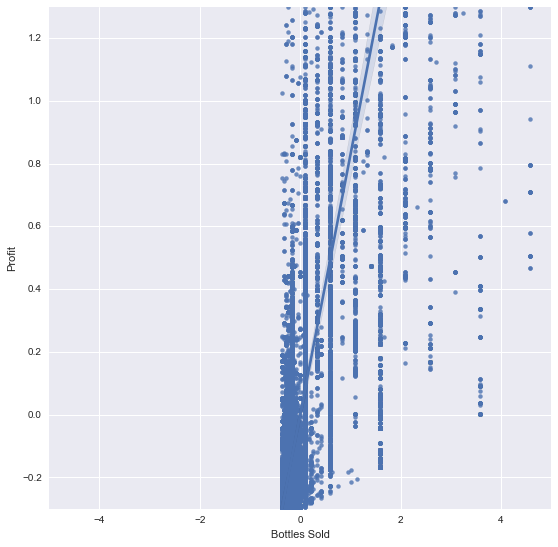

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(9,9)
sns.regplot(sales_n['Bottles Sold'], sales_n['Profit'], ax=ax)
ax.set_xlim(-5, 5)
ax.set_ylim(-0.3, 1.3)